Derive spec2vec embeddings of MS/MS spectra

In [1]:
import os
import sys
import gensim
import numpy as np

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\Gosia\\Desktop\\'
sys.path.insert(0, ROOT)

Import dataset to create embeddings from, here: pre-processed dataset "Unique InchiKeys"

In [2]:
import passatuto_parser as pp
sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\passatuto_parser.py')


pre_spectrums_query = pp.PassatutoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatutoParser('C:\\Users\\Gosia\\Desktop\\Gnps').parse_folder()

# Using MatchMS to create spectra for both
from matchms.importing.load_from_json import as_spectrum
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 457 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4077 spectra 
processed 100
processe

In [3]:
from matchms.filtering import normalize_intensities
# Spec2Vec trained model requires normalizing
spectrums_query = [normalize_intensities(s) for s in spectrums_query]
spectrums_lib = [normalize_intensities(s) for s in spectrums_lib]


Load pretrained spec2vec model

In [4]:
path_models = os.path.join(path_data, "trained_models_1")
model_file = os.path.join(path_models, "spec2vec_size_170.model")

# Load pretrained model
model = gensim.models.Word2Vec.load(model_file)
print(model_file)

C:\Users\Gosia\Desktop\trained_models_1\spec2vec_size_170.model


Create spectrum "documents"

In [5]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument

documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]
print(documents_query)


[<spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC203D0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C0BECC6BB0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C0940B0F40>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C0940B0F10>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09423FF40>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09423FEB0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC20460>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC204C0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC20520>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC205B0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC20610>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC20670>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001C09DC206D0>, <spec2vec.SpectrumDocume


Derive embeddings

In [6]:
from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 70 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_query = np.zeros((len(documents_query), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_query)):
    embeddings_spec2vec_query[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_lib)):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.



Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.33%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 1 word(s) missing in the model.

Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.99%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.63%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 449 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.91%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.60%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 488 word(s) missi

Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.77%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.04%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.39%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.63%.
Found 15 word(s) missing in t

Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.41%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.01%.
Found 364 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 627 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.85%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.30%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.42%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 18 word(s) m

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.60%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.70%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.98%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 159 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.39%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.97%.
Found 197 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.85%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.25%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.77%.
Found 2 word(s) missi

Found 508 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.62%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.73%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.53%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.53%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.54%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.25%.
Found 760 word(s) missin

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.64%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.62%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.69%.
Found 274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.12%.
Found 159 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.61%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 323 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.95%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.36%.
Found 1054 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.28%.
Found 193 word(s) miss

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.18%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.40%.
Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.88%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.20%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.01%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.66%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.14%.
Found 12 word(s) missing in the

Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.70%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.24%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.55%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.23%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.45%.
Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.98%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.52%.
Found 12 word(s) missin

Found 528 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.13%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.31%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.54%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.96%.
Found 353 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.48%.
Found 282 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.86%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.19%.
Found 244 word(s) m

Found 457 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.91%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.35%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.48%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.11%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.81%.
Found 93 word(s) missi

Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.26%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 307 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.58%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.94%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.25%.
Found 30 word(s) missin

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.84%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.90%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.57%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.70%.
Found 87 word(s) missing in the

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.18%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.59%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.49%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.12%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.74%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.77%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 178 word(s) missing in

Found 643 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.34%.
Found 2802 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.00%.
Found 541 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.68%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 270 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 1317 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.25%.
Found 784 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.94%.
Found 509 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.29%.
Found 108 wor

Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 303 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.29%.
Found 577 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.41%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.38%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.41%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.16%.
Found 308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.14%.
Found 246 word(

Found 314 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.87%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.53%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.55%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.74%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.09%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.36%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.10%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.25%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.38%.
Found 209 word(s) 

Found 1791 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.82%.
Found 230 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.67%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.78%.
Found 992 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.24%.
Found 417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.55%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.21%.
Found 229 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.46%.
Found 114 word

Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.80%.
Found 206 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.00%.
Found 1017 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.41%.
Found 900 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.94%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 440 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.94%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.93%.
Found 516 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.10%.
Found 190 wor

Found 879 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.57%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.88%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 533 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.12%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.00%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.25%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.31%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 318 word(s) mis

Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.39%.
Found 1024 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.54%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.01%.
Found 383 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.10%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.86%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.53%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.73%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 136 word(

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.15%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.94%.
Found 334 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 169 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.05%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 3214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.82%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.92%.
Found 508 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.83%.
Found 180 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.31%.
Found 263 word

Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.96%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.15%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.53%.
Found 150 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.46%.
Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 309 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.90%.
Found 195 word(s

Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.34%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.31%.
Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.15%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.75%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 410 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.42%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.01%.
Found 25 wo

Found 343 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.46%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.04%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 162 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.86%.
Found 976 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.07%.
Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 504 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.29%.
Found 245 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.70%.
Found 581 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.78%.
Found 218 wor

Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.55%.
Found 126 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 920 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.23%.
Found 218 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.39%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.16%.
Found 191 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.08%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.20%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.69%.
Found 11 word(s

Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 605 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.69%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.14%.
Found 685 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.15%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.15%.
Found 103 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 322 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.85%.
Found 454 wor

Found 169 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.96%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.99%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.99%.
Found 1774 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 674 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.27%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.43%.
Found 309 wor

Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.90%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.52%.
Found 459 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.48%.
Found 359 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.61%.
Found 516 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.74%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.75%.
Found 169 word(s) mi

Found 716 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.87%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.92%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.78%.
Found 240 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.21%.
Found 109 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.56%.
Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.62%.
Found 562 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.91%.
Found 161 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.70%.
Found 160 word

Found 375 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.37%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.66%.
Found 4987 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.91%.
Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.18%.
Found 645 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.70%.
Found 363 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 46 word

Found 199 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.59%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.36%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.15%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 1207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.59%.
Found 219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.56%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.01%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.01%.
Found 126 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.73%.
Found 696 word

Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 249 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.19%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.34%.
Found 164 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.69%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.60%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 818 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.80%.
Found 50 word(s)

Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 284 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.19%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.41%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.87%.
Found 617 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.36%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.27%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.10%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.32%.
Found 483 word(s)

Found 232 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.22%.
Found 792 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.44%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.69%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.93%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.60%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found 2887 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.44%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.08%.
Found 199 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.86%.
Found 265 word

Found 234 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.48%.
Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.64%.
Found 94 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.79%.
Found 578 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.08%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.80%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.10%.
Found 1069 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.02%.
Found 191 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.96%.
Found 1031 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.41%.
Found 193 wo

Found 3110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.79%.
Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.76%.
Found 793 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.53%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 372 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.96%.
Found 549 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 868 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 830 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.58%.
Found 1123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.68%.
Found 364 w

Found 323 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.59%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.17%.
Found 2977 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.10%.
Found 2001 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.33%.
Found 1830 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.86%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.42%.
Found 1952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.87%.
Found 963 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 712 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.99%.
Found 87

Found 682 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.23%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 458 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.38%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.05%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.64%.
Found 1445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.45%.
Found 473 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.43%.
Found 224 word(s

Found 2706 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.47%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.20%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.85%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.37%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.44%.
Found 843 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.30%.
Found 109 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.15%.
Found 460 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.03%.
Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 2192 w

Found 1089 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.40%.
Found 437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.57%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.64%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.72%.
Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.03%.
Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.41%.
Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 264 wor

Found 824 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 676 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.56%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.30%.
Found 2743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.77%.
Found 381 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.58%.
Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.19%.
Found 1866 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.49%.
Found 212 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.99%.
Found 18

Found 2607 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.55%.
Found 2145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.36%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.03%.
Found 1023 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.42%.
Found 539 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.57%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.71%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.45%.
Found 2797 wo

Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.43%.
Found 1756 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.03%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.65%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.52%.
Found 51 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.09%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.21%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.14%.
Found 429 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.03%.
Found 2637 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.17%.
Found 58 wo

Found 243 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.36%.
Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.92%.
Found 1651 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.40%.
Found 367 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.95%.
Found 2446 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.48%.
Found 1139 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.93%.
Found 368 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.67%.
Found 214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.02%.
Found 24

In [7]:
print([np.round(x, 4) for x in embeddings_spec2vec_query[0,:]])
print([np.round(x, 4) for x in embeddings_spec2vec_lib[0,:]])

[23.2044, -20.389, 28.4649, 59.8809, -15.1307, -21.7299, 2.1196, 33.4574, 17.0029, 53.8169, -3.2227, -2.7188, -15.8201, -50.2283, 5.2874, 23.9428, -24.4773, -7.0739, 1.8695, 44.6728, -38.4968, -24.9718, 8.7718, -79.5329, 38.4108, 16.002, -6.078, 16.9825, 15.2667, 2.3005, 20.5668, -13.9236, -21.9189, 21.7501, 11.967, 1.6314, -39.6661, -9.1814, 49.666, -13.4897, -32.6787, -7.5778, 59.4199, -33.7258, -13.5606, 24.9558, -16.3025, 6.2814, -1.6132, 29.1948, 5.3982, -1.5789, -5.9826, -0.0874, 28.0036, -20.1628, -63.2055, -50.5374, 24.1685, -28.7643, 13.7203, 19.0774, 64.7883, 35.5039, -46.9714, 30.4529, 59.0905, 4.2571, -17.5899, -26.9854, 17.012, 52.6083, 22.1841, -53.6553, -43.3623, 37.2474, 59.3553, 18.8403, 46.4893, 22.9234, -89.8358, -4.1095, 56.6307, -79.1973, 30.0058, -10.5056, 18.3867, 5.1393, 49.3855, 86.7074, 56.3102, -31.2564, -34.4686, 9.259, -43.9436, -37.6386, -25.7461, 12.5767, 5.2235, 38.4426, -7.9346, 4.4016, 2.7611, 62.4138, -43.9911, 57.6108, 48.338, -43.8801, -19.3797, -24

In [8]:
from cosine_calc import get_hits

hits,_ = get_hits( documents_query, documents_lib, spec2vec_model=model,
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)
len(hits)

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.38%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 110 word(s) missing

Found 1247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.09%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.44%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.99%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.72%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.56%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.28%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.24%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.19%.
Found 105 wor

Found 1310 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.65%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.22%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.09%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.44%.
Found 917 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.19%.
Found 346 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.35%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.43%.
Found 40 word(s) 

Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.78%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 1423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 2549 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.80%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.67%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 378 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.22%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 16 word(s

Found 393 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.27%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.66%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.41%.
Found 231 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.16%.
Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.01%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.91%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.75%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 208 word(s) mi

Found 473 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.43%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.63%.
Found 336 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.74%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.88%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.81%.
Found 239 word(s) missi

Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.18%.
Found 249 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.19%.
Found 219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.95%.
Found 316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 51.00%.
Found 254 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.84%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.70%.
Found 415 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 99 word

Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.12%.
Found 330 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.11%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.29%.
Found 617 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.96%.
Found 861 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.33%.
Found 762 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.96%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.36%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 4 word(s

Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.67%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.11%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.83%.
Found 671 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.77%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.60%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.10%.
Found 997 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.19%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 5 word(

Found 95 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.19%.
Found 1348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.39%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.56%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.97%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.82%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.98%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 873 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.76%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.25%.
Found 16 word(s) m

Found 468 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.01%.
Found 1681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.21%.
Found 1038 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.14%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.96%.
Found 515 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.13%.
Found 446 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.81%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.28%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.43%.
Found 101 

Found 812 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.97%.
Found 859 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.78%.
Found 2512 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.74%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.83%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.03%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.94%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.43%.
Found 31 word(s) m

Found 2400 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.35%.
Found 1588 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.73%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 1090 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 297 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 191 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 139 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 793 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.53%.
Found 754 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.59%.
Found 798

Found 1698 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.66%.
Found 1274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.67%.
Found 73 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.57%.
Found 429 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.03%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.42%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 389 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.85%.
Found 516 wo

Found 1167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.52%.
Found 1645 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.11%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.93%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.42%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.17%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.94%.
Found 1316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.05%.
Found 204 word(

Found 1183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.50%.
Found 906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.97%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.86%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 174 word(s) missin

Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 626 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.45%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.59%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.11%.
Found 464 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.93%.
Found 372 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.96%.
Found 1219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.83%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.81%.
Found 6 word(s) 

Found 1601 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.05%.
Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.05%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.92%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.65%.
Found 1256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.81%.
Found 1720 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.89%.
Found 2065 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.73%.
Found 229 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.30%.
Found 98 

Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.91%.
Found 325 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.47%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.00%.
Found 517 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.42%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.51%.
Found 203 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.82%.
Found 443 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.39%.
Found 699 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.43%.
Found 1579 word(

Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.16%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 2145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.36%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.70%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 529 word(s) missing

Found 1158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.53%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.66%.
Found 1080 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.86%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.50%.
Found 122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.09%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.81%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.26%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.99%.
Found 244 word(s) 

Found 700 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 640 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.38%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.17%.
Found 814 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.50%.
Found 1353 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.43%.
Found 1473 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.51%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.70%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.39%.
Found 278 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 696 w

Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.00%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.67%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.84%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.59%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.
Found 130 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.84%.
Found 1770 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.09%.
Found 466 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.34%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.55%.
Found 725 word(s) 

Found 861 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.59%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.03%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.00%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.38%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.65%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.60%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.28%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.90%.
Found 49 word(s) missin

Found 761 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.63%.
Found 504 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.29%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.66%.
Found 859 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.01%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.94%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 232 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.22%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 94 word(s) missi

Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.84%.
Found 530 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.64%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 1482 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 965 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.43%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.33%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.91%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 229 word(s

Found 976 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.07%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.80%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.07%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.26%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.75%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.12%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.26%.
Found 1322 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.79%.
Found 2 word(s) miss

Found 1207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.59%.
Found 671 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.26%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.16%.
Found 1054 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.28%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.50%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.70%.
Found 1027 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.24%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.44%.
Found 1898 word

Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.17%.
Found 197 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.04%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.61%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.59%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 396 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.60%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.57%.
Found 324 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 1 word(s) m

Found 2112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.94%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.04%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.81%.
Found 477 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.21%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.45%.
Found 818 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.80%.
Found 2995 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.75%.
Found 1594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.25%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.16%.
Found 18

Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.21%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.11%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.46%.
Found 51 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.23%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.04%.
Found 262 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.07%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.93%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.71%.
Found 1 word(s) missing i

Found 363 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.94%.
Found 556 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.93%.
Found 566 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.24%.
Found 177 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.31%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.45%.
Found 343 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.08%.
Found 325 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.91%.
Found 287 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.06%.
Found 594 word

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.66%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.94%.
Found 443 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.12%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.33%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.86%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.93%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.98%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.03%.
Found 224 word(s) mis

Found 2575 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 462 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.09%.
Found 498 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.12%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.37%.
Found 2706 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.47%.
Found 186 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.34%.
Found 298 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 620 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.27%.
Found 33 word(s) 

Found 518 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.23%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.28%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.27%.
Found 103 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.43%.
Found 2843 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.93%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.85%.
Found 410 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.55%.
Found 405 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.21%.
Found 402 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.25%.
Found 105 wo

Found 934 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.10%.
Found 103 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.06%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.52%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 206 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.09%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.40%.
Found 264 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.10%.
Found 799 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.44%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.18%.
Found 263 word(

Found 643 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.34%.
Found 458 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.51%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.85%.
Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.24%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.93%.
Found 230 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.12%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.44%.
Found 443 word(s) mi

Found 1239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.01%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.91%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.75%.
Found 960 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.64%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.18%.
Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.75%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.40%.
Found 161 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.95%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.06%.
Found 1 word(s) 

Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.30%.
Found 541 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.22%.
Found 159 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.48%.
Found 1714 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.04%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.78%.
Found 531 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.46%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.54%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.63%.
Found 303 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.29%.
Found 2 word(s) 

Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.86%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.25%.
Found 276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.29%.
Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.27%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.16%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.49%.
Found 73 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.90%.
Found 1655 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.20%.
Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.70%.
Found 124 word(s) m

Found 343 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.46%.
Found 911 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.72%.
Found 460 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.03%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.65%.
Found 474 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.22%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.92%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 17 word(s) 

Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.68%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 169 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.85%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.22%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.79%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.15%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.91%.
Found 131 word(s) missi

Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.47%.
Found 291 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.09%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.43%.
Found 1140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.46%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.75%.
Found 3722 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.96%.
Found 146 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.35%.
Found 109 word(s) 

Found 1055 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.93%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.43%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.13%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 480 word(s) missing in the model. Weighted missing percentage not covered by the given model is 57.89%.
Found 526 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.29%.
Found 64 word(s) mi

Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.27%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 485 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.37%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.80%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.19%.
Found 533 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.12%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.99%.
Found 122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.29%.
Found 757 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.89%.
Found 50 word(s) missin

Found 868 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 639 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.98%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.68%.
Found 175 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.01%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 13 word(s) missing i

Found 852 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.58%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.71%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.21%.
Found 1890 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.68%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.23%.
Found 649 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.07%.
Found 3 word(s) missing 

361

In [9]:
documents_query[0]._obj.metadata

{'compound_name': 'Acamprosate',
 'instrument': 'LTQ Orbitrap XL Thermo Scientific',
 'formula_smiles': 'C5H11NO4S',
 'smiles': 'O=S(=O)(O)CCCNC(=O)C',
 'inchi': 'InChI=1S/C5H11NO4S/c1-5(7)6-3-2-4-11(8,9)10/h2-4H2,1H3,(H,6,7)(H,8,9,10)',
 'charge': 1,
 'adduct': '[M+H]+',
 'parent_mass': 182.0482}

In [10]:
# Loading the decoy database
pre_spectrums_decoys = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyConditionalPeaks').parse_folder()
pre_spectrums_decoys_rand = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyRandomPeaks').parse_folder()

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 f

In [11]:
# Using MatchMS to create spectra decoy
decoys = []
for i, s in enumerate( pre_spectrums_decoys ):
    decoys.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

decoys_rand = []
for i, s in enumerate( pre_spectrums_decoys_rand ):
    decoys_rand.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)


processed 100
processed 200
processed 300
processed 400
processed 500
processed 600
processed 700
processed 800
processed 900
processed 1000
processed 1100
processed 1200
processed 1300
processed 1400
processed 1500
processed 1600
processed 1700
processed 1800
processed 1900
processed 2000
processed 2100
processed 2200
processed 2300
processed 2400
processed 2500
processed 2600
processed 2700
processed 2800
processed 2900
processed 3000
processed 3100
processed 3200
processed 3300
processed 3400
processed 3500
processed 3600
processed 3700
processed 3800
processed 3900
processed 4000
processed 100
processed 200
processed 300
processed 400
processed 500
processed 600
processed 700
processed 800
processed 900
processed 1000
processed 1100
processed 1200
processed 1300
processed 1400
processed 1500
processed 1600
processed 1700
processed 1800
processed 1900
processed 2000
processed 2100
processed 2200
processed 2300
processed 2400
processed 2500
processed 2600
processed 2700
processed 280

In [12]:

from matchms.filtering import normalize_intensities
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import select_by_relative_intensity
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import add_losses

def post_process(s):
    s = normalize_intensities(s)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = require_minimum_number_of_peaks(s, n_required=10)
    s = reduce_to_number_of_peaks(s, n_required=10, ratio_desired=0.5)
    if s is None:
        return None
    s_remove_low_peaks = select_by_relative_intensity(s, intensity_from=0.001)
    if len(s_remove_low_peaks.peaks) >= 10:
        s = s_remove_low_peaks
        
    s = add_losses(s, loss_mz_from=5.0, loss_mz_to=200.0)
    return s

# Spec2Vec trained model requires normalizing
decoys = [post_process(s) for s in decoys]
decoys_rand = [post_process(s) for s in decoys_rand]
# omit spectrums that didn't qualify for analysis

decoys = [s for s in decoys if s is not None]
decoys_rand = [s for s in decoys_rand if s is not None]

C:\Users\Gosia\anaconda3\envs\fdr-metab\lib\site-packages\matchms\filtering\normalize_intensities.py:21: RuntimeWarning: invalid value encountered in true_divide
  normalized_intensities = intensities / max_intensity


In [13]:
documents_decoys = [SpectrumDocument(s, n_decimals=2) for s in decoys]
documents_decoys_rand = [SpectrumDocument(s, n_decimals=2) for s in decoys_rand]


In [14]:
vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_decoys = np.zeros((len(documents_decoys), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys)):
    embeddings_spec2vec_decoys[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_decoys_rand = np.zeros((len(documents_decoys_rand), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_rand)):
    embeddings_spec2vec_decoys_rand[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.90%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.84%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.27%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.38%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.51%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.63%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.02%.
Found 14 word(s) missing in th

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.31%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.59%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.89%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.88%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.71%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.62%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.43%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.48%.
Found 9 word(s) missing 

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.96%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.53%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.19%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.69%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.04%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.18%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.07%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.45%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.49%.
Found 19 word(s) mis

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.52%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.73%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.35%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.85%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.91%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.47%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.47%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.54%.
Found 16 word(s) missing

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.62%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.01%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.81%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.46%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.53%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.03%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.94%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.87%.
Found 17 word(s) missing

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.92%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.29%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.68%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.63%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.28%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.77%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.83%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.03%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 15 word(s) missi

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.25%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.78%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.41%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.94%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.06%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.43%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.19%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.84%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.31%.
Found 20 word(s) missi

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.06%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.45%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.26%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.47%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.59%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.21%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.38%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.36%.
Found 13 word(s) missing 

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.75%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.65%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.17%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.99%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.87%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.06%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.36%.
Found 10 word(s) missing i

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.49%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.79%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.38%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.93%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.34%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.95%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.24%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.23%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.86%.
Found 17 word(s) missin

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.96%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.48%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.75%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.33%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.82%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.59%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.91%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.90%.
Found 25 word(s) mis

Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.33%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.83%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.66%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.96%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.29%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.37%.
Found 4 word(s) missing

Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.88%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.74%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.30%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.33%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.74%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.72%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.82%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.71%.
Found 24 word(s) missin

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.33%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.81%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.17%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.59%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.94%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.51%.
Found 14 word(s) mi

Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.82%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.68%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.54%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.05%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.77%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.74%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.42%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.67%.
Found 16 word(s) mi

Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.77%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.88%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.74%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.18%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.37%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.45%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.09%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.51%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.18%.
Found 8 word(s) missing

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.63%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.16%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.50%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.61%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.86%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.57%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.50%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.56%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.99%.
Found 27 word(s) miss

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.01%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.36%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.35%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.71%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.81%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.90%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.58%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.79%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.28%.
Found 28 word(s) missing 

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.13%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.90%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.51%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.09%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.24%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.82%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.78%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.16%.
Found 3 word(s) missing in 

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.38%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.56%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.22%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.09%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.57%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.52%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.51%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.17%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.66%.
Found 10 word(s) miss

Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.41%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.86%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.38%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.07%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.70%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.03%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.96%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.21%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 23 word(s) miss

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.13%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.22%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.80%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.19%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.44%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.85%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.95%.
Found 9 word(s) missing 

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.36%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.88%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.63%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.01%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.36%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.03%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.09%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.83%.
Found 2 word(s) missing in 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.94%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.97%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.09%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.98%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.92%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.07%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.42%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.41%.
Found 11 word(s) missing i

Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.71%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.21%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.94%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.01%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.35%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.23%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.07%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.49%.
Found 12 word(s) missin

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.24%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.54%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.40%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.17%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.74%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.93%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.22%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.27%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.32%.
Found 16 word(s) missin

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.07%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.80%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.55%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.80%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.99%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.61%.
Found 22 word(s) missing in

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.00%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.13%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.03%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.39%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.07%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.42%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.45%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.64%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.96%.
Found 7 word(s) missing i

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.52%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.79%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.25%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.53%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.49%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.78%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.14%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.47%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.13%.
Found 9 word(s) missing i

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.78%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.33%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.25%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.84%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.82%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.34%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.50%.
Found 16 word(s) missing 

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.11%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.21%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.52%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.75%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.82%.
Found 10 word(s) missing in 

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.55%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.73%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.40%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.09%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.09%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.29%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.05%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.99%.
Found 16 word(s) missing 

Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.96%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.22%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.86%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.82%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.30%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.37%.
Found 3 word(s) missing 

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.35%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.64%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.72%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.89%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.57%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.63%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.12%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.74%.
Found 2 word(s) missing i

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.53%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.79%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.85%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.39%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.70%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.70%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.48%.
Found 12 word(s) missin

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.02%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.74%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.46%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.79%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.95%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.36%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.75%.
Found 7 word(s) missing in 

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.05%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.66%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.92%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.54%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.20%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.03%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.90%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.68%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.68%.
Found 20 word(s) missi

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.95%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.65%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.69%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.89%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.35%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.76%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.30%.
Found 23 word(s) missing

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.26%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.75%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.52%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.37%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.26%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.55%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.92%.
Found 48 word(s) missing i

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.56%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.07%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.25%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.72%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.47%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.31%.
Found 14 word(s) missin

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.58%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.01%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.63%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.67%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.65%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.87%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.61%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.23%.
Found 10 word(s) missing 

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.96%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.70%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.41%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.59%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.94%.
Found 9 word(s) missin

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.27%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.50%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.82%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.94%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.54%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.21%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.72%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.58%.
Found 18 word(s) missi

Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.10%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.79%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.98%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.93%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.61%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.59%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.06%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.00%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.03%.
Found 20 word(s) mi

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.83%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.46%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.83%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.92%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.42%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.38%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.71%.
Found 26 word(s) mi

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.44%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.54%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.58%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.83%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.43%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.34%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.83%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.97%.
Found 4 word(s) miss

Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.49%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.50%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.75%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.08%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.68%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.82%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.87%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.17%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.74%.
Found 17 word(s) mis

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.81%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.09%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.11%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.28%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.87%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.28%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.03%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.15%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.73%.
Found 20 word(s) missin

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.03%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.41%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.20%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.55%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.44%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.10%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.62%.
Found 22 word(s) miss

In [15]:

def add_pmz(specs):
    from rdkit.Chem import MolFromSmiles, MolToSmiles, MolFromInchi
    from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
    for s in specs:
        s._obj.set('precursor_mz', s._obj.get('parent_mass', 0))
        
add_pmz(documents_query)

In [16]:
import copy
documents_decoys = []
for v,d in zip(embeddings_spec2vec_decoys,documents_lib):
    #print("knockoff:",ko,"vector",v,"document",d)
    #print("\n")
    e = copy.deepcopy(d)
    e._obj.set('inchi', 'knockoff')
    e._obj.set('inchikey_inchi', 'knockoff')
    e._obj.set('vector', v)
    documents_decoys.append(e)

hits_decoys, _ = get_hits(documents_query, documents_decoys, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)


documents_decoys_rand = []
for v,d in zip(embeddings_spec2vec_decoys_rand,documents_lib):
    #print("knockoff:",ko,"vector",v,"document",d)
    #print("\n")
    e = copy.deepcopy(d)
    e._obj.set('inchi', 'knockoff')
    e._obj.set('inchikey_inchi', 'knockoff')
    e._obj.set('vector', v)
    documents_decoys_rand.append(e)

hits_decoys_rand, _ = get_hits(documents_query, documents_decoys_rand, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)


Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.38%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 110 word(s) missing

Found 1247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.09%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.44%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.99%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.72%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.56%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.28%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.24%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.19%.
Found 105 wor

Found 1310 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.65%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.22%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.09%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.44%.
Found 917 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.19%.
Found 346 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.35%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.43%.
Found 40 word(s) 

Found 182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.65%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.27%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.95%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.12%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.45%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.78%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 244 word(s)

Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.19%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.92%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.50%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.23%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.63%.
Found 79 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.05%.
Found 393 word(s) 

Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.00%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.71%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.20%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.66%.
Found 576 word(s) missing in the model. Weighted missing percentage not covered by the given model is 60.18%.
Found 544 word(s) missin

Found 685 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.75%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.39%.
Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.81%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.40%.
Found 192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.94%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.91%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.27%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.65%.
Found 83 wor

Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.03%.
Found 1098 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found 681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 1108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.85%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.52%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 24 word(

Found 1592 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.38%.
Found 747 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 573 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.14%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.
Found 431 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.33%.
Found 22 word(s) mi

Found 417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.55%.
Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.36%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.64%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.71%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.42%.
Found 58 word(s)

Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.72%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.01%.
Found 367 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 2809 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.48%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 3582 wo

Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.08%.
Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.35%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.27%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 159 word(s) mis

Found 368 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.04%.
Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.52%.
Found 994 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.38%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 17 word(s) m

Found 1350 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.11%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 7 word(s) mi

Found 469 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.68%.
Found 168 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.76%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.42%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.47%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.37%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.62%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.58%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 94 word(s) 

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.91%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.67%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 583 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 2227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 2348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.60%.
Found 1017 wor

Found 578 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.33%.
Found 444 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.00%.
Found 484 word(s) miss

Found 562 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.91%.
Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 1778 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.15%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 144 wor

Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.09%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.87%.
Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.20%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.04%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 58 word(s) mi

Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.41%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.09%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 313 word(s) mis

Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 1511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 998 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.18%.
Found 933 word

Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 1825 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.51%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.26%.
Found 506 word(s) miss

Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 503 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.67%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.10%.
Found 281 word(s

Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.17%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.52%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.88%.
Found 696 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.56%.
Found 2192 word(s) m

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1000 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.00%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.40%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.65%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.13%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 884 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.59%.
Found 761 word(s) missin

Found 455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.30%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.22%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1528 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 240 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 239 word(s

Found 1246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.95%.
Found 283 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.54%.
Found 586 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.32%.
Found 3452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.77%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.41%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 200 wor

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.63%.
Found 1182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.65%.
Found 837 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.69%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.86%.
Found 253 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.90%.
Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.39%.
Found 375 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.65%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.62%.
Found 899 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.46%.
Found 67

Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.56%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.56%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 361 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.74%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.02%.
Found 115 word(s) 

Found 2789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.12%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.54%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.94%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.73%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.52%.
Found 1142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.76%.
Found 502 word(

Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.78%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.32%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.44%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.63%.
Found 1101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 354 word(s

Found 4437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.79%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.33%.
Found 1774 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 1102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.80%.
Found 2582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.76%.
Found 257 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.30%.
Found 1237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.90%.
Found 84 

Found 423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.45%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.18%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.53%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.62%.
Found 1308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.58%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.84%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.16%.
Found 165 word(s)

Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found 1938 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.64%.
Found 2360 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.43%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.64%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.88%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.53%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 307 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.70%.
Found 48 word(

Found 675 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.24%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.41%.
Found 1995 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.18%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.53%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.42%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.25%.
Found 1242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.24%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.13%.
Found 5 word(s) 

Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 1140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.52%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.55%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.60%.
Found 3261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.53%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.78%.
Found 541 word(

Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.67%.
Found 1309 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.60%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.36%.
Found 656 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.15%.
Found 112 wor

Found 1388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.69%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.51%.
Found 502 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.81%.
Found 566 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.97%.
Found 3274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.12%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 305 word(s)

Found 3029 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.28%.
Found 1066 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.31%.
Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 2320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.85%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 1682 word(s) 

Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.47%.
Found 989 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 524 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.83%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.05%.
Found 780 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 539 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.12%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 1276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.73%.
Found 380 word

Found 523 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.02%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.50%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.56%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.87%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.97%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.54%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.19%.
Found 618 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.33%.
Found 26 word(s) 

Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.84%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.40%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.46%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.39%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 395 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.89%.
Found 440 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.70%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.36%.
Found 384 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.63%.
Found 65 word(

Found 452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.97%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.47%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.04%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.75%.
Found 126 word(s) miss

Found 916 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.21%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.44%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.02%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.21%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.36%.
Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.19%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.92%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 66 word(s) m

Found 1209 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.10%.
Found 353 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.87%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 385 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.88%.
Found 365 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.73%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.00%.
Found 2 word(

Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.39%.
Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.81%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.40%.
Found 192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.94%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.91%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.27%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.65%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.36%.
Found 1252 wo

Found 1098 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found 681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 1108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.85%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.52%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.31%.
Found 42 word(s

Found 1592 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.38%.
Found 747 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 573 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.14%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.
Found 431 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.33%.
Found 22 word(s) mi

Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.36%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.64%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.71%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.42%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.20%.
Found 65 word(s) 

Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.72%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.01%.
Found 367 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 2809 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.48%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 3582 wo

Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.08%.
Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.35%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.27%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 159 word(s) mis

Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.52%.
Found 994 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.38%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 14 word(s) mis

Found 1350 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.11%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 7 word(s) mi

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.39%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.62%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.60%.
Found 428 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.05%.
Found 676 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.05%.
Found 469 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.68%.
Found 168 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.76%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.42%.
Found 399 word(

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.91%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.67%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 583 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 2227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 2348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.60%.
Found 1017 wor

Found 164 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.19%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.60%.
Found 578 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.33%.
Found 444 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 7 word(s) missi

Found 562 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.91%.
Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 1778 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.15%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 144 wor

Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.20%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.04%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.63%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.62%.
Found 20 word(s) mi

Found 511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.40%.
Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.41%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.09%.
Found 600 word(s) mis

Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 1511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 998 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.18%.
Found 933 word

Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.80%.
Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 1825 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.51%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 144 word(s) mis

Found 1034 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.30%.
Found 149 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.51%.
Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 503 word(s

Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.60%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.72%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.89%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.63%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.33%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.34%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 64 word(s)

Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.79%.
Found 225 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.81%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.44%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.83%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.61%.
Found 246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.03%.
Found 13 word(s) missing 

Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.55%.
Found 692 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.26%.
Found 938 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.64%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.97%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.92%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 218 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.19%.
Found 212 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.00%.
Found 203 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 30 word(s

Found 1805 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.43%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.77%.
Found 2903 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.48%.
Found 286 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.51%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.80%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.91%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.14%.
Found 20 word

Found 830 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.58%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.95%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.63%.
Found 1182 word(s) missi

Found 334 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.98%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.28%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 577 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.41%.
Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.56%.
Found 247 word(s) missin

Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.89%.
Found 1445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.28%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 579 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.97%.
Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.99%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.93%.
Found 2789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.12%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.54%.
Found 44 word(s) m

Found 2624 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.11%.
Found 893 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.09%.
Found 905 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 705 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.01%.
Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.78%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 113 word

Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.77%.
Found 534 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 430 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.69%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.13%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.11%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.07%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.78%.
Found 4437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.79%.
Found 201 word

Found 1112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.48%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 418 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.63%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 95 word(s

Found 1558 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.83%.
Found 3134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 1224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.72%.
Found 1417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.61%.
Found 1419 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.20%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found

Found 2604 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.51%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.54%.
Found 2474 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.93%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.96%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.26%.
Found 675 word(s) 

Found 739 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.28%.
Found 2802 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 1140 word(

Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.46%.
Found 2187 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.41%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.84%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.84%.
Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 707 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.94%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 567 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.86%.
Found 2112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.93%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.31%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 188 word(

Found 1759 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.14%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.65%.
Found 337 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.83%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.06%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.39%.
Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.23%.
Found 275 word

Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 497 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.53%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.31%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.65%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.44%.
Found 220 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.86%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 326 word(s

In [17]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [18]:
# Calculating estimated q-value scores
q_list_estimated = calculate_q_value(hits+hits_decoys,True)
q_list_estimated_rand = calculate_q_value(hits+hits_decoys_rand,True)
print(q_list_estimated)

[(0, True, 0.9412615819722328), (0.0, True, 0.9393656282467497), (0.0, True, 0.8700468364556839), (0.0, True, 0.8381633310354213), (0.0, True, 0.8300459540083702), (0.0, True, 0.8271809274458036), (0.0, True, 0.8210307262118586), (0.0, False, 0.8208806023995363), (0.0, True, 0.8197039467119901), (0.0, True, 0.8117937917554281), (0.0, True, 0.8107150755473582), (0.0, True, 0.8023664776227003), (0.0, True, 0.7988531994598876), (0.0, True, 0.7866961504751785), (0.0, True, 0.7860371362200206), (0.0, True, 0.7854508173045008), (0.0, True, 0.7852296015108415), (0.0, True, 0.784569119220546), (0.0, True, 0.7728562086555935), (0.0, True, 0.7717701016768589), (0.0, True, 0.7704922764971283), (0.0, True, 0.7619000855702619), (0.0, True, 0.7595213695890564), (0.0, True, 0.7584087709912382), (0.0, True, 0.7582026414931113), (0.0, True, 0.7457147528081497), (0.0, True, 0.7422402381722712), (0.0, True, 0.7395928574204328), (0.0, True, 0.7393264207837336), (0.0, True, 0.7282035222962828), (0.0, True,

In [29]:
from knockoffs import generate_knockoffs, evaluate_knockoff_performance
#diags = [0.00000070, 0.00000075, 0.00000080, 0.00000085, 0.00000090, 0.00000095]
#diags for 170 comp = [0.0000000011,0.000000011,0.00000011,0.00000031,0.00000061,0.00000191]
#diags = [10, 1, 0.1]#, 0.4, 0.1]#, 0.0001, 0.00001]
diags = [130]
randy = [True]#, False]
#sigs = [1]#,2,4,10,20]
q_list_knockoffs = {}
for diag in diags:
    for rand in randy:
        for comp in [3]:#10,30]:
                try:
                    knockoff_documents = generate_knockoffs(model,documents_lib,allowed_missing_percentage=allowed_missing_percentage,n_components=comp, diagonal_matrix=diag, randomness=rand)

                    hits_knockoffs, _ = get_hits(documents_query, knockoff_documents, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                                            intensity_weighting_power=intensity_weighting_power,
                                                                            allowed_missing_percentage=allowed_missing_percentage, passatutto=True)
                    q_list_knockoffs[(diag, comp)] = calculate_q_value(hits+hits_knockoffs,True)
                except Exception as e:
                    print( diag, "failed", e )
                    #raise

Embedding vector size: 170
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.38%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.69%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.44%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.23%

Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.73%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.70%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.17%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.75%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.27%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.35%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.95%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.11%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.86%.
Found 244 word(s) mi

Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.97%.
Found 548 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.77%.
Found 103 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.36%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.05%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.58%.
Found 1540 word(s) miss

Found 686 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.18%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.29%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 216 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.87%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.15%.
Found 769 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.64%.
Found 1113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.96%.
Found 891 word

Found 364 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.03%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.19%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 1089 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.40%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.00%.
Found 1768 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.53%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.59%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.74%.
Found 98 word(

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.74%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.88%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.81%.
Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.98%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.20%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.57%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.73%.
Found 1 word(s) missing i

Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.70%.
Found 415 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.44%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.87%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.02%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 148 word(s) miss

Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.12%.
Found 330 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.11%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.29%.
Found 617 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.96%.
Found 861 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.33%.
Found 762 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.96%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.36%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 4 word(s

Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.67%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.11%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.83%.
Found 671 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.77%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.60%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.10%.
Found 997 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.19%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 5 word(

Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.20%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.62%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.41%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.59%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.57%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.33%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.46%.
Found 84 word(s) missi

Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.72%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.01%.
Found 2809 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 3582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.69%.
Found 1606 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.16%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.48%.
Found 100 

Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.35%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.27%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.48%.
Found 853 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.33%.
Found 159 word(s) m

Found 368 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.04%.
Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.52%.
Found 994 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.38%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 715 word(s) 

Found 1350 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.11%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 978 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.31%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 29 word(s) 

Found 73 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.69%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.39%.
Found 276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.03%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.62%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.60%.
Found 428 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.05%.
Found 168 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.76%.
Found 469 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.68%.
Found 676 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.05%.
Found 28 word(s

Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.11%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.15%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.36%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.71%.
Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.91%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 583 word(s) miss

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 578 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 164 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.19%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.60%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 185 word(s) missin

Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 1778 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.15%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.57%.
Found 41 word

Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.87%.
Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.20%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.04%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.75%.
Found 58 word(s) mi

Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.41%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.09%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 313 word(s) mis

Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 1511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 1110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.13%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 998 wor

Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.80%.
Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.46%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 144 word(s) miss

Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 503 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.67%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.10%.
Found 281 word(s

Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.72%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.89%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.63%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.33%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.34%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 31 word(s) 

Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.81%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 3872 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.44%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.83%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.61%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.03%.
Found 13 word(s) missing

Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.37%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.67%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.75%.
Found 692 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.26%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.55%.
Found 938 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.64%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.97%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.92%.
Found 87 word(s) 

Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.08%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.71%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.22%.
Found 1805 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.43%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.77%.
Found 2903 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.48%.
Found 286 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 265 word(

Found 830 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.58%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.95%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 5 word(s) missing in t

Found 223 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.29%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.17%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.42%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.94%.
Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 334 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.98%.
Found 49 word(s) missin

Found 1069 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.02%.
Found 770 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 1593 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.37%.
Found 684 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.76%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.34%.
Found 183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.94%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.89%.
Found 1445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.28%.
Found 61 word

Found 2624 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.11%.
Found 893 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.09%.
Found 905 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 705 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.01%.
Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.78%.
Found 71 word(

Found 534 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 430 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.69%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.13%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.11%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.07%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.78%.
Found 4437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.79%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 394 word

Found 1112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.48%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.74%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 418 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.63%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 233 word(s)

Found 1558 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.83%.
Found 3134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 1224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.72%.
Found 1417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.61%.
Found 1419 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.20%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found

Found 2604 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.51%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.48%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.54%.
Found 2474 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.93%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.96%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.26%.
Found 64 word(s) m

Found 991 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.09%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.62%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.91%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 739 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 19 word(s) missing i

Found 2187 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.41%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.84%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missin

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.84%.
Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 707 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.94%.
Found 567 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.86%.
Found 2112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.93%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.31%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 188 word(

Found 1759 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.14%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.65%.
Found 337 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.83%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.06%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.39%.
Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.23%.
Found 275 word

Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.65%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.31%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.44%.
Found 220 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.86%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.60%.
Found 263 word(s

Found 1342 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.11%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.79%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 563 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.94%.
Found 1791 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.82%.
Found 1308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.65%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.68%.
Found 127 word(s

Found 1327 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.34%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.
Found 250 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 457 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 900 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.58%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.18%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 251 word(s)

Found 4987 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.90%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.60%.
Found 6 word(s) missing i

Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.24%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.26%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.63%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.63%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.03%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 96 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.19%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.61%.
Found 123 word(s) missi

Found 537 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.13%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.04%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.60%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.94%.
Found 610 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.97%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 115 word(s) missing

Found 963 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.80%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.89%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.76%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.83%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.84%.
Found 90 word(s) m

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.81%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.07%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.92%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.99%.
Found 2927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.67%.
Found 603 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.88%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 2887 word(s) missin

Found 820 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.07%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.57%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.83%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.99%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.41%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.18%.
Found 38 word(s) 

Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.97%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.07%.
Found 420 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.71%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.51%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.18%.
Found 236 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.63%.
Found 556 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.54%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.99%.
Found 334 word(

Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.35%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.54%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.04%.
Found 378 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 210 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.04%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.80%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.01%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.16%.
Found 4 word(s) missi

Found 339 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.14%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.45%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.69%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.97%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.38%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.07%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.93%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.22%.
Found 136 word(s)

Found 308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.84%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.23%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.41%.
Found 339 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.41%.
Found 422 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.57%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.41%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.29%.
Found 465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.21%.
Found 32 wor

Found 719 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.74%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.08%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.84%.
Found 109 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.15%.
Found 584 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.63%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.64%.
Found 143 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.42%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.20%.
Found 38 word(s

Found 1561 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.45%.
Found 1358 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.14%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.87%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.17%.
Found 163 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.39%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.85%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.83%.
Found 223 word(s)

Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.73%.
Found 471 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.90%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.88%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.49%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.53%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.20%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.63%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.83%.
Found 150 word(s) 

Found 122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.61%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.79%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.29%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 282 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.86%.
Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.55%.
Found 248 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 228 word(s) m

Found 835 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.44%.
Found 567 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.93%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.11%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.65%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.31%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.19%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.33%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.42%.
Found 122 word(s) m

Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.97%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.75%.
Found 361 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.23%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.99%.
Found 511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.46%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 67 word(s) miss

Found 2512 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.74%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.83%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.03%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.94%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.43%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.65%.
Found 720 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.51%.
Found 38 word(s) mi

Found 1588 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.73%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 1090 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 297 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 191 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 139 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 793 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.53%.
Found 754 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.59%.
Found 798 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.49%.
Found 30 w

Found 1274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.67%.
Found 73 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.57%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 429 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.03%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.42%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 516 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.03%.
Found 389 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.85%.
Found 2 word(

Found 1167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 1645 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.11%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.93%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.42%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.17%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.94%.
Found 1316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.05%.
Found 204 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.81%.
Found 36 word(s

Found 1183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.50%.
Found 906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.97%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.86%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.80%.
Found 126 word(s) missin

Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.59%.
Found 626 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.45%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.11%.
Found 464 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.93%.
Found 372 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.96%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.16%.
Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.43%.
Found 26 word

Found 601 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.43%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.92%.
Found 1601 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 473 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.29%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.05%.
Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.05%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.92%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.65%.
Found 1256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.81%.
Found 229 

Found 902 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.04%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.17%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.91%.
Found 325 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.47%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.00%.
Found 517 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.42%.
Found 203 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.82%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.51%.
Found 443 word(s

Found 5370 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.91%.
Found 3167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.78%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 94 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.91%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.69%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.
Found 268 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.45%.
Found 2 word(s)

Found 788 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.44%.
Found 246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.96%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.35%.
Found 310 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.38%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 1158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.53%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1080 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.86%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.50%.
Found 927 word(s

Found 633 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.90%.
Found 606 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.41%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 51 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.31%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.31%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.10%.
Found 700 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 640 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.38%.
Found 39 word(s) mis

Found 1211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.73%.
Found 422 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.72%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.91%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.99%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.48%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 316 word(s) miss

Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.17%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.52%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.88%.
Found 696 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.56%.
Found 2192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.28%.
Found 549 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.66%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.52%.
Found 24 word(s) 

Found 609 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.75%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1000 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.00%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.40%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.65%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.13%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 884 word(s) missin

Found 455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.30%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.22%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1528 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 240 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 239 word(s

Found 1246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.95%.
Found 283 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.54%.
Found 586 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.32%.
Found 3452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.77%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.41%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 200 wor

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.63%.
Found 1182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.65%.
Found 837 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.69%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.86%.
Found 253 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.90%.
Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.39%.
Found 375 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.65%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.62%.
Found 899 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.46%.
Found 67

Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.56%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.56%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 361 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.74%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.02%.
Found 115 word(s) 

Found 2789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.12%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.54%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.94%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.73%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.52%.
Found 1142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.76%.
Found 502 word(

Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.78%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.32%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.44%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.63%.
Found 1101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 354 word(s

Found 4437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.79%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.33%.
Found 1774 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 1102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.80%.
Found 2582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.76%.
Found 257 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.30%.
Found 1237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.90%.
Found 84 

Found 418 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.63%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 95 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.45%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.18%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.53%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.62%.
Found 1308 word(s) 

Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found 1938 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.64%.
Found 2360 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.43%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.64%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.88%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.53%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 307 word

Found 675 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.24%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.41%.
Found 1995 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.18%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.53%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.42%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.25%.
Found 1242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.24%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.13%.
Found 5 word(s) 

Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 1140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.52%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.55%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.60%.
Found 3261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.53%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.78%.
Found 541 word(

Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.67%.
Found 1309 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.60%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.36%.
Found 656 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.15%.
Found 112 wor

Found 1388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.69%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.51%.
Found 502 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.81%.
Found 566 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.97%.
Found 3274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.12%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 305 word(s)

Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.87%.
Found 3029 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.28%.
Found 1066 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.31%.
Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 2320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.85%.
Found 12 word(s) mi

Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.47%.
Found 989 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 524 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.83%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.05%.
Found 780 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 539 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.12%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 1276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.73%.
Found 380 word

Found 130 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.53%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.60%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.23%.
Found 3295 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.48%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.61%.
Found 494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.78%.
Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.48%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.67%.
Found 404 wo

Found 1455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.67%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.56%.
Found 204 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.70%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.53%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.75%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.54%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.59%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.69%.
Found 577 word(s) mis

Found 270 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.14%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.84%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.61%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.62%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.83%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.33%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 369 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 35 word(s) missi

Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.57%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.77%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.89%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.69%.
Found 204 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.93%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.01%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.99%.
Found 58 word(s) missi

Found 1033 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.25%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.89%.
Found 358 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 444 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.14%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.81%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 371 word(s) miss

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.50%.
Found 1627 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.80%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 358 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.30%.
Found 1045 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.83%.
Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 6 word(s) missing in 

Found 603 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.88%.
Found 2927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.67%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.14%.
Found 442 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.44%.
Found 328 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.55%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 2887 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.44%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 65 word(s) miss

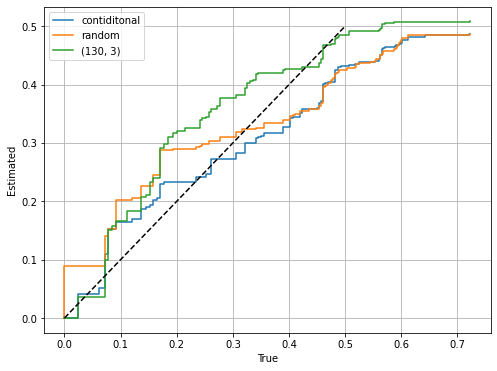

In [30]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores, trues, estimateds = zip(*combine_true_est(q_list_true, q_list_estimated))
scores_rand, trues_rand, estimateds_rand = zip(*combine_true_est(q_list_true, q_list_estimated_rand))
to_plot = {'contiditonal':(trues,estimateds), 'random':(trues_rand,estimateds_rand)}
for k,v in q_list_knockoffs.items():
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]

import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )

In [21]:
q_list_knockoffs[(6,True)]
len(documents_query), len(hits), len(hits_decoys), len(hits_knockoffs), len(q_list_true), len(q_list_knockoffs[(6,True)])

KeyError: (6, True)

In [ ]:
#print(knockoff_documents[0]._obj.metadata['vector'])
#print(list(zip( knockoff_documents[0]._obj.metadata['vector'], calc_vector(model, documents_lib[0],
#                                       intensity_weighting_power=intensity_weighting_power,
#                                       allowed_missing_percentage=allowed_missing_percentage)) ) )

print(sorted([(h.score, h.query._obj.metadata['compound_name']) for h in hits],reverse=True)[:30])
print(sorted([(h.score, h.query._obj.metadata['compound_name']) for h in hits_knockoffs],reverse=True)[:30])
#print(len(hits), len(knockoff_documents))

In [ ]:
raise RuntimeError("Halt!")
import copy

import cosine_calc
import numpy as np
import plot_q_vals
from numpy.random import uniform
from q_value_calc import calculate_q_value
from sklearn.mixture import GaussianMixture
from spec2vec.vector_operations import calc_vector


# checking if a given matrrix is positive definite
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


n_components = 10
document_spectra=documents_lib

# embedding given documents
vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_lib = np.zeros((len(document_spectra), vector_size), dtype="float")
for i, doc in enumerate(document_spectra):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                            intensity_weighting_power,
                                                            allowed_missing_percentage)

# creating the gaussian mixture
gm = GaussianMixture(n_components=n_components, covariance_type='diag').fit(embeddings_spec2vec_lib)

gm.means_
gm.covariances_

raise RuntimeError("Halt!")

n_dim = len(embeddings_spec2vec_lib[0])
# diagonal matrix

np.predict_proba(gm.means_)

all_knockoffs = []
# generate N knock-offs
for point in zip( embeddings_spec2vec_lib ):
    Sigma = np.eye(n_dim) * cov
    # define the mean and covariance
    Sigma = Sigma * sigma_multiplier

    #np.random.choice = predict_proba(point)
    D = np.eye(n_dim) * diagonal_matrix

    joint_cov = np.hstack((Sigma, Sigma - D))
    joint_cov = np.vstack((joint_cov, np.hstack((Sigma - D, Sigma))))

    assert is_pos_def(joint_cov), "Joint covariance matrix has to be positive definite"

    A = np.eye(n_dim) - np.dot(D, np.linalg.inv(Sigma))
    kmu = np.dot(np.dot(D, np.linalg.inv(Sigma)), mu)
    B = np.dot(A, point.T)
    kmu += B
    if randomness:
        kSigma = 2 * D - np.dot(np.dot(D, np.linalg.inv(Sigma)), D)
        ko = np.random.multivariate_normal(kmu.flatten(), kSigma, 1)
        all_knockoffs.append(ko)
    else:
        all_knockoffs.append([kmu])


knockoff_documents = []
for ko, v, d in zip(all_knockoffs, embeddings_spec2vec_lib, document_spectra):
    e = copy.deepcopy(d)
    e._obj.set('inchi', 'knockoff')
    e._obj.set('inchikey_inchi', 'knockoff')
    e._obj.set('vector', ko[0])
    knockoff_documents.append(e)
#return knockoff_documents


In [ ]:
probs = gm.predict_proba([embeddings_spec2vec_lib[0]])
#print(list(map(sum,zip(*probs))))
print(probs[0])

for i, prob in enumerate(probs):
    if max(prob) < 0.52:
        print(i,prob)
        break

idxs = [0,1,2,3,4,5,6,7,8,9]
print(np.random.choice(idxs, p=prob))

In [ ]:
print(np.eye(n_dim) * gm1.covariances_[0])
print(gm1.covariances_[0])